<a href="https://colab.research.google.com/github/CodeHunterOfficial/Practical-Time-Series-Analysis/blob/main/Chapter_4_TimeSeriesModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Моделирование временных рядов


In [ ]:
До настоящего момента нами обсуждались только вопросы сбора и извлечения временных рядов, а также их обработки. В этой главе речь пойдет о создании временных ряды в результате моделирования. Нам предстоит обсудить три основных вопроса. Во-первых, сравнить принципы моделирования временных рядов с таковыми в других способах моделирования данных, отмечая особенности процесса, вызванные необходимостью учета течения времени. Во-вторых, изучить несколько программных примеров моделирования. И в-третьих, обсудить важные тенденции моделирования временных рядов. Основная часть этой главы будет посвящена примерам кода, отвечающего за генерацию временных рядов разных типов. Среди них выделяются следующие наиболее важные ситуации.


До настоящего момента нами обсуждались только вопросы сбора и извлечения временных рядов, а также их обработки. В этой главе речь пойдет о создании временных ряды в результате моделирования. 

Нам предстоит обсудить три основных вопроса. 

*  Cравнить принципы моделирования временных рядов с таковыми в других способах моделирования данных, отмечая особенности процесса, вызванные необходимостью учета течения времени. 

*  Изучить несколько программных примеров моделирования. 

*  Обсудить важные тенденции моделирования временных рядов. 


Основная часть этой главы будет посвящена примерам кода, отвечающего за генерацию временных рядов разных типов. Среди них выделяются следующие наиболее важные ситуации.

*  Моделирование поведения членов благотворительной организации, заключающегося в изучении почтовых сообщений и внесении добровольных пожертвований в течение всего срока членства в организации. Пример напрямую связан с данными, которые были описаны в главе 2.
*  Моделирование событий в таксопарке, насчитывающем 1000 автомобилей, каждый из которых описывается с разным временем начала смены и количеством перевозимых пассажиров в течение рабочего дня.
*  Пошаговое моделирование состояния твердого магнитного тела при заданной температуре и размерах, описываемого строгими физическими законами.


Каждый пример подчиняется одному из следующих способов моделирования временных рядов.

1.  Эвристическое моделирование
>  Мы сами решаем, как должен работать мир, обеспечиваем его “разумность” и самостоятельно пишем код управления таким миром.

2.  Моделирование дискретных событий
> Создаем объекты системы, подчиняющиеся определенным правилам, а затем активизируем их, чтобы посмотреть, как такая система будет эволюционировать с течением времени.

3. Моделирование физических систем
> Применяем физические законы, чтобы отслеживать поведение системы с течением времени.

Моделирование временных рядов — это важная аналитическая задача, примеры выполнения которой неоднократно рассматриваются в последующих главах при изучении конкретных моделей.


# Особенности моделирования временных рядов

Моделирование данных выступает разновидностью анализа данных, которому редко обучают, но который находит широкое применение при работе с временными рядами. Это следует из одного из недостатков временных данных: никакие две точки данных в одном и том же временном ряду не могут быть точно сопоставимыми, поскольку они относятся к разному времени. Как только мы задумаемся о том, что могло бы произойти в данный момент времени, сразу же перейдем в область моделирования. 

In [ ]:
Моделирование может описываться как простым, так и сложным процессами. 

Моделирование временных рядов остается активной областью исследований (необычайно требовательной к производительности вычислительного оборудования) во многих отраслях и дисциплинах.

*  Метеорология.
*  Финансы.
*  Эпидемиология.
*  Квантовая химия.
*  Физика плазмы.

В некоторых из представленных случаев фундаментальные правила поведения системы хорошо изучены, но описать их бывает трудно из-за высокой сложности уравнений (например, в метеорологии, квантовой химии, физике плазмы). Кроме того, далеко не всегда в системе известны все исследуемые величины, а сделать точный прогноз не представляется возможным из-за стохастической нелинейной природы изучаемых процессов (например, в финансах и эпидемиологии).


# Моделирование и прогнозирование

Моделирование и прогнозирование — схожие задачи. В обоих случаях сначала нужно сформулировать гипотезу о параметрах и поведении базовой системы, а затем экстраполировать имеющиеся данные для получения новых точек. Наряду с этим нужно четко понимать различия между принципами моделирования и прогнозирования.


*  Иногда качественные наблюдения проще обрабатывать методами моделирования, а не прогнозирования.
*  Моделирование выполняется в определенном масштабе, что позволяет увидеть множество альтернативных сценариев, в то время как прогнозы составляются предельно точно.
*  Моделирование — не такое рискованное занятие, как прогнозирование. Моделирование не влияет на события реальной жизни и не вызывает потерь важных ресурсов — в первых сеансах моделирования вы можете проявлять максимум фантазии и изобретательности. Конечно, рано или поздно вам захочется обосновать модель точно так же, так это делается в прогнозировании.


# Моделирование с помощью программного кода

Далее мы рассмотрим три примера программ моделирования временных рядов. Изучая их, постарайтесь понять, насколько большими могут быть наборы данных, используемые в качестве источников “временных рядов”, генерируемых в процессе моделирования.

В этом разделе нам предстоит рассмотреть три следующих примера моделирования.

*  Моделирование искусственного набора данных для проверки гипотезы о поведении членов организации, в частности о том, что их отношение к электронным письмам, полученным от благотворительной организации, коррелирует (или нет) с готовностью вносить благотворительные пожертвования. Это яркий пример жесткого генерирования исходных табличных данных и определения взаимосвязей между данными, устанавливаемых в программном коде с помощью циклов for и подобных им структур.
* Моделирование синтезированного набора данных, используемого для изучения совокупного поведения водителей в таксопарке с учетом рабочего графика и количества перевозимых пассажиров в зависимости от времени суток. В этом наборе данных акцент делается на объектно-ориентированных атрибутах языка Python и генераторах, которые оказываются незаменимыми при тестировании и изучении поведения системы.
* Моделирование физического поведения магнитного материала, заключающегося в переориентировании отдельных магнитных элементов, которые вначале пребывают в беспорядке, но в конечном итоге объединяются в хорошо упорядоченную систему. В этом примере показано, что принципы моделирования временных рядов могут основываться на физических законах, предопределяющих временной масштаб и другие характеристики модели.



# Самостоятельная работа

При написании программы моделирования необходимо помнить о логических правилах, определяющих поведение системы. Ниже рассматривается пример программы, в которой выполняется жесткая проверка логической целостности данных (например, из системы исключаются события, которые противоречат ее логике).

В начале кода проверяется состояние членства в организации — устанавливается количество членов благотворительной организации и моментов времени вступления в нее. Каждый из членов организации участника получает определенный статус.



In [6]:
 import numpy as np
 import pandas as pd
 ## Статус членов организации
years = ['2014', '2015', '2016', '2017', '2018']
print(years)

['2014', '2015', '2016', '2017', '2018']


In [7]:
memberstatus = ['bronze', 'silver', 'gold', 'inactive']
print(memberstatus)

['bronze', 'silver', 'gold', 'inactive']


In [8]:
memberYears = np.random.choice (years, 1000, p = [0.1, 0.1, 0.15, 0.30, 0.35])
print(memberYears)

['2018' '2017' '2014' '2017' '2017' '2017' '2014' '2018' '2017' '2018'
 '2017' '2018' '2017' '2016' '2018' '2018' '2016' '2014' '2017' '2017'
 '2017' '2018' '2018' '2017' '2016' '2017' '2015' '2018' '2018' '2018'
 '2018' '2015' '2015' '2017' '2015' '2016' '2018' '2018' '2018' '2017'
 '2018' '2016' '2017' '2014' '2017' '2017' '2014' '2018' '2017' '2018'
 '2017' '2014' '2017' '2015' '2017' '2017' '2018' '2016' '2016' '2018'
 '2018' '2015' '2018' '2016' '2014' '2018' '2014' '2017' '2018' '2017'
 '2015' '2018' '2016' '2018' '2017' '2017' '2017' '2017' '2017' '2018'
 '2014' '2016' '2018' '2014' '2018' '2018' '2014' '2018' '2016' '2018'
 '2018' '2017' '2017' '2018' '2017' '2017' '2018' '2018' '2017' '2017'
 '2016' '2017' '2017' '2018' '2014' '2017' '2015' '2015' '2016' '2018'
 '2017' '2014' '2018' '2018' '2016' '2017' '2018' '2018' '2018' '2018'
 '2016' '2018' '2018' '2018' '2018' '2018' '2017' '2016' '2018' '2018'
 '2016' '2018' '2018' '2015' '2018' '2018' '2016' '2017' '2018' '2017'
 '2017

In [9]:

memberStats = np.random.choice(memberstatus, 1000, p = [0.5, 0.3, 0.1, 0.1])
print(memberStats)

['bronze' 'bronze' 'silver' 'bronze' 'silver' 'bronze' 'bronze' 'silver'
 'silver' 'silver' 'bronze' 'bronze' 'silver' 'bronze' 'bronze' 'silver'
 'silver' 'bronze' 'bronze' 'gold' 'silver' 'bronze' 'bronze' 'bronze'
 'bronze' 'inactive' 'bronze' 'bronze' 'gold' 'gold' 'bronze' 'bronze'
 'inactive' 'inactive' 'silver' 'bronze' 'bronze' 'silver' 'silver'
 'bronze' 'silver' 'silver' 'bronze' 'silver' 'silver' 'bronze' 'gold'
 'bronze' 'bronze' 'gold' 'bronze' 'silver' 'silver' 'bronze' 'silver'
 'bronze' 'bronze' 'gold' 'gold' 'bronze' 'silver' 'inactive' 'silver'
 'bronze' 'gold' 'silver' 'silver' 'bronze' 'bronze' 'gold' 'bronze'
 'bronze' 'silver' 'bronze' 'inactive' 'silver' 'bronze' 'bronze'
 'inactive' 'bronze' 'bronze' 'inactive' 'silver' 'bronze' 'bronze'
 'silver' 'bronze' 'gold' 'bronze' 'bronze' 'bronze' 'inactive' 'gold'
 'silver' 'bronze' 'silver' 'inactive' 'silver' 'bronze' 'inactive'
 'silver' 'bronze' 'bronze' 'silver' 'silver' 'gold' 'bronze' 'bronze'
 'inactive' 'silve

In [10]:
yearJoined = pd.DataFrame({'yearJoined': memberYears, 'memberStats': memberStats})
print(yearJoined)

    yearJoined memberStats
0         2018      bronze
1         2017      bronze
2         2014      silver
3         2017      bronze
4         2017      silver
..         ...         ...
995       2017      bronze
996       2016        gold
997       2017      silver
998       2014    inactive
999       2018        gold

[1000 rows x 2 columns]


В приведенных выше строках кода сделано несколько предположений и реализовано несколько важных правил моделирования процесса. В них задаются вероятности вступления в организацию в каждом анализируемом году. Кроме того, здесь предполагается, что статус члена организации никак не связан с годом вступления в организацию. В реальном мире ситуация выглядит несколько иначе — более точным будет предположение о существовании слабой связи между этими переменными, особенно в случаях заинтересованности организации в сохранении своих членов. 

Далее в коде создается таблица со сведениями об открытии электронных писем членами организации в течение каждой недели. В данном случае считается, что организации свойственно следующее поведение: рассылка всем членам по три электронных письма в неделю. Кроме того, в коде определяются возможные поведенческие реакции членов организации на получение почтовых сообщений.

*  Никогда не открывает электронную почту
*  Максимальный уровень взаимодействия (постоянно открывает электронную почту)
*  Увеличение или уменьшение уровня взаимодействия

Мы можем усложнить поведенческие правила, корректируя отдельные параметры модели в зависимости от принятия старых или создания новых предположений о ненаблюдаемых процессах, влияющих на данные.

In [12]:
## Python
NUM_EMAILS_SENT_WEEKLY = 3
## Определение функций для разных поведенческих шаблонов

def never_opens(period_rng): 
  return []
					
def constant_open_rate(period_rng): 
  n, p = NUM_EMAILS_SENT_WEEKLY, np.random.uniform(0, 1) 
  num_opened = np.random.binomial(n, p, len(period_rng)) 
  return num_opened
					
def increasing_open_rate(period_rng): 
  return open_rate_with_factor_change(period_rng,				
                                      np.random.uniform(1.01, 
                                      1.30))
					
def decreasing_open_rate(period_rng): 
  return open_rate_with_factor_change(period_rng,
                                      np.random.uniform(0.5, 
                                      0.99))
				
def open_rate_with_factor_change(period_rng, fac): 
    if len(period_rng) < 1 :	
       return []
    times = np.random.randint(0, len(period_rng),
                               int(0.1 * len(period_rng))) 
    num_opened = np.zeros(len(period_rng))
    for prd in range(0, len(period_rng), 2): 
        try:
            n, p = NUM_EMAILS_SENT_WEEKLY, np.random.uniform(0, 
                                                             1)
            num_opened[prd:(prd + 2)] = np.random.binomial(n, p, 
                                                           2)
            p = max(min(1, p * fac), 0)
        except:	
            num_opened[prd] = np.random.binomial(n, p, 1)
    for t in range(len(times)):
        num_opened[times[t]] = 0
    return num_opened 

Выше определены функции моделирования четырех различных типов поведения.
Пользователи, никогда не открывающие отправленные им электронные письма

never_opens()

Пользователи, открывающие примерно одинаковое количество писем каждую неделю

constant_open_rate()

Пользователи, открывающие меньшее количество электронных писем каждую неделю

decreasing_open_rate()

Пользователи, открывающие большее количество электронных писем каждую неделю

increasing_open_rate()


Поведение членов организации, которые с течением времени становятся более активными или, наоборот, более пассивными, описывается подобным образом с помощью функции open_rate_with_factor_change (), основанной на функциях increasing_open_rate() и decreasing_open_rate(). 

Далее нам нужно определиться с моделью внесения добровольных пожертвований. Она не должна быть слишком простой, иначе это приведет к неправильному пониманию описываемых процессов. Другими словами, в модель внесения пожертвований нужно включить текущие предположения о поведении членов организации, а затем проверить, соответствуют ли они модели и наблюдениям, представленным реальными данными. Ниже приведен код описания процесса внесения пожертвований, находящегося в слабой зависимости от количества писем, открываемых членом организации в течение недели.


In [13]:
## Python
## Внесение пожертвований
def produce_donations(period_rng, member_behavior, num_emails, 
                      use_id, member_join_year):
    donation_amounts = np.array([0, 25, 50, 75, 100, 250, 500, 
                                 1000, 1500, 2000])
    member_has = np.random.choice(donation_amounts)
    email_fraction = num_emails / (NUM_EMAILS_SENT_WEEKLY * len(period_rng)) 
    member_gives = member_has * email_fraction
    member_gives_idx = np.where(member_gives >= donation_amounts)[0][-1]
    member_gives_idx = max(min(member_gives_idx,
                               len(donation_amounts) - 2),
                           1)
    num_times_gave = np.random.poisson(2) * (2018 - member_join_year)
    times = np.random.randint(0, len(period_rng), num_times_gave)
    dons = pd.DataFrame({'member'   : [],
                         'amount'   : [],
                         'timestamp': []})
					
    for n in range(num_times_gave):
        donation = donation_amounts[member_gives_idx + np.random.binomial(1, .3)]
        ts = str(period_rng[times[n]].start_time + random_weekly_time_delta())
        dons = dons.append(pd.DataFrame(
                  {'member' :[use_id],
                   'amount' :[donation],
                   'timestamp': [ts]}))

        if dons.shape[0] > 0:
            dons = dons[dons.amount != 0]
            ## быть записанным в реальной базе данных
           ## Если сумма пожертвования равна нулю, она не будет сообщена.
             ## При работе с реальным миром эта информация не отражается в базе данных.
    
            return dons

Чтобы сделать модель более реалистичной, в коде реализуются следующие важные предположения.
*  Общая сумма пожертвований зависит от общего срока членства в организации.
*  Каждому из членов организации назначается уровень благосостояния, с помощью которого обыгрывается предположение о том, что сумма денежного взноса напрямую зависит от суммы, которую человек готов выделить на добровольные пожертвования.

Поскольку поведение наших участников строго фиксируется по временным меткам, каждому члену организации нужно определить неделю и день внесения пожертвований. Напишем вспомогательную функцию выбора случайного времени в течение недели.


In [14]:
def random_weekly_time_delta():
    days_of_week = [d for d in range(7)]
    hours_of_day = [h for h in range(11, 23)] 
    minute_of_hour = [m for m in range(60)] 
    second_of_minute = [s for s in range(60)]
    return pd.Timedelta(str(np.random.choice(days_of_week)) + " days" ) + pd.Timedelta(str(np.random.choice(hours_of_day)) + " hours" ) + pd.Timedelta(str(np.random.choice(minute_of_hour)) + " minutes") + pd.Timedelta(str(np.random.choice(second_of_minute)) + " seconds") 

Легко заметить, что в приведенном выше коде обрабатываются только часы временной метки в диапазоне от 11 до 23 (hours_of_day = [h for h in range (11, 23) ]). Предполагается, что все члены организации проживают в смежных часовых поясах или даже в общем часовом поясе, поэтому мы не обрабатываем часы вне указанного диапазона. Таким способом мы заметно ограничиваем базовую модель поведения пользователей. 

Итак, мы ожидаем увидеть унифицированное поведение наших пользователей, как если бы они все находились в одном или нескольких смежных часовых поясах. Кроме того, считается, что людям свойственно переводить пожертвования в дневное время — с позднего утра до позднего вечера, но не ночью и не ранним утром, сразу же после пробуждения.

Наконец, нам нужно объединить все компоненты модели и смоделировать поведение определенного количества членов организации и соответствующих событий, возникающих только вследствие получения членства в организации, таким образом, чтобы обеспечить некоторое (но не пренебрежимо малое) влияние событий просмотра электронной почты на события внесения пожертвований.


In [15]:
behaviors        = [never_opens, 
                    constant_open_rate, 
                    increasing_open_rate, 
                    decreasing_open_rate] 
member_behaviors = np.random.choice(behaviors, 1000,
                                    [0.2, 0.5, 0.1, 0.2]) 
				
rng = pd.period_range('2015-02-14', '2018-06-01', freq = 'W')
emails = pd.DataFrame({'member'      : [],
                       'week'        : [],
                       'emailsOpened': []})	
donations = pd.DataFrame({'member'   : [],
                          'amount'   : [],
                          'tunestamp': []})	
					
for idx in range(yearJoined.shape[0]):
 ## случайным образом сгенерировать дату, когда участник должен был присоединиться
     ## Генерировать случайным образом, когда участник присоединился
    join_date = pd.Timestamp(yearJoined.iloc[idx].yearJoined) + pd.Timedelta(str(np.random.randint(0, 365)) + ' days')
    join_date = min(join_date, pd.Timestamp('2018-06-01')).to_period(freq='W')

  ## участник не должен иметь отметки времени действия перед присоединением
     ## У вас не должно быть временных меток для каких-либо действий перед присоединением
    member_rng = rng[rng > join_date] 

    if len(member_rng) < 1:
        continue

    info = member_behaviors[idx](member_rng) 
    if len(info) == len(member_rng):
        emails = emails.append(pd.DataFrame(
           {'member': [idx] * len(info),
            'week': [str(r.start_time) for r in member_rng],
            'emailsOpened': info})) 
        donations = donations.append(
           produce_donations(member_rng, member_behaviors[idx], 
                                sum(info), idx, join_date.year)) 

Теперь нужно изучить временное поведение доноров, чтобы понять, как можно использовать эту информацию в дальнейшем анализе или прогнозировании. Отобразим общую сумму ежемесячных добровольных пожертвований, вычисленных из набора данных

In [16]:
rng = pd.period_range('2015-02-14', '2018-06-01', freq = 'W')

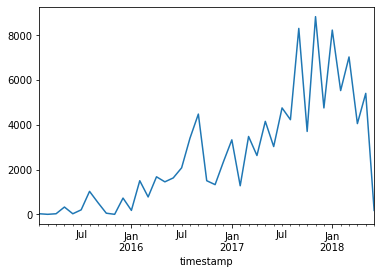

In [17]:
donations.set_index(pd.to_datetime(donations.timestamp), inplace = True) 
donations.sort_index(inplace = True)
donations.groupby(pd.Grouper(freq='M')).amount.sum().plot() 

Как видите, объем пожертвований и количество открытых электронных писем увеличились с 2015 по 2018 год. Это неудивительно, поскольку за этот же период у организации прибавилось членов, о чем свидетельствует общее количество новых членов, присоединившихся к организации за учитываемые годы. Фактически одно из допущений нашей модели заключалось в том, что мы должны сохранять информацию о каждом члене неопределенный длительный период времени после его вступления в организацию. Мы не предусмотрели возможность выхода из организации, хотя и учли, что ее члены могут потерять интерес к благотворительной деятельности (отказ от просмотра электронных писем). Однако даже в этом случае за ними сохраняется возможность внесения пожертвований. 

Таким образом, нам следует доработать код, чтобы исключить из него нереалистичный сценарий неограниченного членства и срока внесения пожертвований. В нашем примере мы несколько отходим от классических принципов моделирования временных рядов и занимаемся скорее генерированием табличных данных. Но не нужно забывать и том, что нашей конечной целью было получение временных рядов. Поэтому генерирование табличных данных выполнялось с учетом следующих факторов и предположений.
*  Общее количество временных рядов.
*  Моделируемые временные тренды.

> — В случае электронной почты мы будем придерживаться трех трендов: постоянной, растущей и падающей частот просмотра электронной почты.

> — Внесение добровольных пожертвований считается шаблонным поведением, коррелирующим с количеством электронных писем, просматриваемым членом организации за анализируемый период времени. Это порождает упреждение, но, поскольку данные генерируются, а не собираются, таким способом описывается лояльность к организации — чем чаще просматриваются электронные письма, тем больше частота внесения пожертвований.

*  События просмотра электронных писем и внесения пожертвований должны приниматься в расчет только после получения членства в организации.
*  Данные не должны уходить в будущее в угоду их конечным потребителям, даже несмотря на то, что в моделировании такие данные всегда приветствуются.

Конечно, полученный нами код не идеален. Он громоздкий и не реализует модель в задуманном виде. Более того, поскольку логика модели проверялась только на программном уровне, в ней могут встречаться ошибки пограничного характера (возникновения событий в нелогической последовательности). Для предотвращения ошибок такого типа, прежде чем приступить к разработке модели, нужно выработать общие показатели и стандарты ее достоверности. 

Итак, нам требуется программное обеспечение, которое сделает модель логичной и целостной. За помощью обратимся к генераторам языка Python.
 

# Создание самоуправляемой среды моделирования

При решении многих задач от вас может потребоваться установить правила для уже имеющейся системы и понаблюдать за их соблюдением. Таким способом, например, можно проанализировать цели использования приложения широким кругом независимых пользователей или протестировать внутреннюю систему принятия решений на устойчивость к внешним воздействиям. Иными словами, вы можете отслеживать вклад отдельных агентов в совокупные показатели с течением времени. Язык Python особенно хорошо подходит для решения такого рода задач благодаря поддержке генераторов. Переходя от анализа данных к написанию программного обеспечения, имеет смысл обратиться к Python, даже если вы чувствуете себя более комфортно, программируя на R. 

Генераторы позволяют создать серию независимых (или зависимых!) объектов и активизировать их для изучения имеющихся возможностей без написания слишком громоздкого кода отслеживания происходящих изменений.

 В следующем примере мы будем моделировать поведение таксопарка. Попробуем представить, как функционирует таксопарк, в котором рабочие смены начинаются в разное время. Для этого создадим определенное количество виртуальных такси, отправим их в виртуальный город и заставим отчитываться о проделанной работе. 
 
 Такое моделирование представляет собой исключительно сложную задачу. В демонстрационных целях признаем, что будем создавать более простую среду, чем та, которая, как нам кажется, отражает действительность (не забывайте о том, что все модели неправдоподобны в той или иной степени). Начнем с изучения понятия генератора в языке Python.
 
 Рассмотрим метод, используемый мною для получения идентификационного номера такси.


In [18]:
## Python
import numpy as np
def taxi_id_number(num_taxis):
 arr = np.arange (num_taxis)
 np.random.shuffle (arr)
 for i in range(num_taxis) :
   yield arr[i]

Тем, кто не знаком с генераторами, будет интересно ознакомиться с результатом выполнения кода.


In [20]:
## Python
ids = taxi_id_number(10)
print (next (ids))
print (next (ids))
print (next (ids))

0
7
6


Числа повторяются до тех пор, пока их не станет 10, после чего реализуется выход из цикла for по исключению Stopiteration.

 Функция taxi id number () создает разовые объекты, не зависящие друг от друга, но сохраняющие сведения о состоянии ее выполнения. Это функция-генератор. Вы можете рассматривать генераторы как небольшие объекты, снабженные специальными переменными состояния, которые оказываются незаменимыми при создании множества схожих объектов с собственными значениями таких переменных. 
 
 В задаче моделирования таксопарка разделим подвижной состав такси на смены, индикация которых выполняется с помощью генератора. Предполагается, что в середине дня на маршруты выезжает больше машин, чем в вечерние или ночные смены, определяемые разными вероятностями начала смены в указанные моменты времени.

In [21]:
## Python
def shift_info () :
 start_times_and_freqs = [(0, 8), (8, 30), (16, 15)]
 indices = np.arange (len(start_times_and_freqs))
 while True:
   idx = np.random.choice (indices, p = [0.25, 0.5, 0.25])
   start = start_times_and_freqs[idx]
   yield (start [0], start [0] + 7.5, start [1])


Обратите внимание на переменную start times and f reqs. С ее определения начинается моделирование временного ряда. В нем указываем, что вероятность выхода такси на маршрут зависит от времени суток. Кроме того, каждому времени суток сопоставляется свое среднее количество поездок. 

Перейдем к написанию более сложного генератора, в котором предыдущие генераторы используются для установки индивидуальных параметров и расписания такси.


In [22]:
def taxi_process(taxi_id_generator, shift_info_generator):
   taxi_id = next(taxi_id_generator)
   shift_start, shift_end, shift_mean_trips = next(shift_info_generator)
   actual_trips = round(np.random.normal(loc   = shift_mean_trips,
                                         scale = 2))
   average_trip_time = 6.5 / shift_mean_trips * 60
  # перевести среднее время в пути в минуты
    # перевести среднее время в пути в минуты
   between_events_time = 1.0 / (shift_mean_trips - 1) * 60
# это эффективный город, где такси редко не используются
    # Этот город настолько эффективен, что все такси почти всегда используются
   time = shift_start
   yield TimePoint(taxi_id, 'start shift', time)
   deltaT = np.random.poisson(between_events_time) / 60
   time += deltaT
   for i in range(actual_trips):
       yield TimePoint(taxi_id, 'pick up ', time)
       deltaT = np.random.poisson(average_trip_time) / 60
       time += deltaT
       yield TimePoint(taxi_id, 'drop off ', time)
       deltaT = np.random.poisson(between_events_time) / 60
       time += deltaT
   deltaT = np.random.poisson(between_events_time) / 60
   time += deltaT
   yield TimePoint(taxi_id, 'end shift ', time) 

Здесь с помощью генераторов сначала определяются идентификационный номер такси, время начала смены и среднее количество поездок. 

После этого такси отправляется по маршруту, выполняя по сформированному для него расписанию определенное количество поездок, каждая из которых совершается для следующего клиента по вызову функции next () из генератора. По сути, этот генератор создает временные ряды данных для отдельного такси. 

Генератор такси возвращает объекты класса TimePoint, которые определяются следующим образом.


In [23]:
## python 							
from dataclasses import dataclass
 							
@dataclass
class TimePoint:
   taxi_id: int
   name: str		
   time: float
				
   def __lt__(self, other):			
       return self.time < other.time 	

Для упрощения кода в нем используется декоратор dataclass () (требуется Python 3.7). Настоятельно рекомендуется ознакомиться с возможностями этого вспомогательного инструмента языка Python всем заинтересованным специалистам по анализу и обработке данных, применяющим его в своих проектах.

## Магические методы в Python

Магические (или дандер) методы в языке Python, имена которых начинаются и заканчиваются двойным подчеркиванием, представляют собой встроенные методы, характерные для целевого класса. Такие методы вызываются автоматически при обращении к соответствующему объекту. Существуют реализации таких методов, которые могут быть переопределены при ручном задании для класса. Существует ряд причин, по которым вы можете захотеть сделать это. Например, в предыдущем коде нужно, чтобы сравнение объектов класса TimePoints выполнялось только по времени, но не по атрибуту taxi id или name.

Термин “дандер” (dunder) происходит от “double under” (двойное подчеркивание).


Кроме автоматически сгенерированного инициализатора класса TimePoint, нам понадобятся два других, более сложных метода:__ It__ (сравнение объектов класса TimePoints) и__ str__ (вывод объектов класса TimePoints, не реализованный здесь). Сравнение необходимо, поскольку сгенерированные в процессе моделирования временные точки объединяются в общую структуру данных, в которых они хранятся в определенном порядке — в очереди по приоритету. Очередь по приоритету — это абстрактный тип данных, в который объекты можно добавлять в любом порядке, но в котором они выстраиваются в порядке, устанавливаемом их приоритетом.


# Абстрактный тип данных

Абстрактный тип данных — это вычислительная модель, определяемая поведением, которая характеризуется заранее оговоренным набором действий и входных данных, а также результатами применения таких действий к определенным наборам данных.

Пример общеизвестного абстрактного типа данных — FIFO (“первым пришел — первым обслужен”). В нем объекты извлекаются из структуры данных в том же порядке, в котором были в нее добавлены. Способы достижения такого принципа зависят от методов реализации, а не от его определения.


Итак, мы располагаем классом моделирования для настройки и запуска генераторов такси. Это нестандартный класс, поскольку обладает специальными функциями — в том числе заданными в инициализаторе — представления входных данных в виде понятной структуры данных и дальнейшей их обработки. Заметьте, что при этом единственной общедоступной является функция run ().

In [24]:
import queue
			
class Simulator:
   def __init__(self, num_taxis):
       self._time_points = queue.PriorityQueue()
       taxi_id_generator = taxi_id_number(num_taxis)
       shift_info_generator = shift_info()
       self._taxis = [taxi_process(taxi_id_generator,
                                   shift_info_generator) for
                                            i in range(num_taxis)]
       self._prepare_run()

   def _prepare_run(self): 
       for t in self._taxis:
           while True: 
               try:
                   e = next(t)
                   self._time_points.put(e)
               except:
                   break
					
   def run(self): 
       sim_time = 0
       while sim_time < 24:
           if self._time_points.empty():
               break
           p = self._time_points.get()
           sim_time = p.time
           print(p) 	

Сначала в коде создается точно такое количество генераторов, какое требуется для моделирования заданного числа машин такси. Затем совершается проход по каждому такси, связанному с классом TimePoints, в результате которого все объекты класса TimePoints располагаются в порядке приоритетности. В пользовательском классе, таком как TimePoint, приоритет объекта определяется в его инициализаторе__It__ сравнением текущей временной точки с начальной точкой. Таким образом, при размещении согласно приоритетности объекты класса TimePoints упорядочиваются по времени их создания. 

Процесс моделирования запускается с помощью следующих команд.


In [25]:
sim = Simulator(1000) 
sim.run() 

Выходные данные были обрезаны до нескольких последних строк (5000).
TimePoint(taxi_id=430, name='pick up ', time=18.466666666666672)
TimePoint(taxi_id=306, name='drop off ', time=18.466666666666672)
TimePoint(taxi_id=632, name='pick up ', time=18.466666666666672)
TimePoint(taxi_id=115, name='drop off ', time=18.466666666666676)
TimePoint(taxi_id=76, name='drop off ', time=18.483333333333327)
TimePoint(taxi_id=798, name='drop off ', time=18.48333333333333)
TimePoint(taxi_id=488, name='drop off ', time=18.48333333333333)
TimePoint(taxi_id=343, name='pick up ', time=18.483333333333334)
TimePoint(taxi_id=724, name='drop off ', time=18.483333333333334)
TimePoint(taxi_id=552, name='drop off ', time=18.483333333333334)
TimePoint(taxi_id=254, name='drop off ', time=18.483333333333334)
TimePoint(taxi_id=248, name='pick up ', time=18.483333333333334)
TimePoint(taxi_id=945, name='pick up ', time=18.483333333333334)
TimePoint(taxi_id=435, name='drop off ', time=18.483333333333334)
TimePoint(taxi_i

# Начальное значение генератора случайных чисел

Создавая код, отвечающий за генерирование случайных чисел, вам может понадобиться сделать его полностью воспроизводимым (например, планируя проводить модульное тестирование, которое обычно выполняется со случайными настройками, или отладку кода со суженным диапазоном изменяемых параметров). Чтобы обеспечить генерирование случайных чисел в одном и том же (неслучайном) порядке, следует определить начальное значение процесса. Это общепринятая настройка — возможность установки начального значения представлена в большинстве языков программирования.


Для простоты отображения мы округлили временные точки до ближайшей минуты, хотя могли остановиться на более точных значениях. Используемое временное разрешение зависит от преследуемых целей.

* Если нужно учитывать влияние машин такси на общегородской трафик, то лучше остановиться на почасовых временных точках.

*  Создавая мобильное приложение вызова такси, нужно исходить из соображений вычислительной нагрузки на сервер. Скорее всего, придется довольствоваться минутной или более высокой разрешающей способностью, чтобы не перегружать сетевую и вычислительную инфраструктуру.

Ранее нами было принято решение регистрировать объекты класса TimePoints каждого такси в момент их “возникновения”. Иначе говоря, мы сообщаем о начале поездки в такси (посадка пассажира), не указывая момента ее окончания, хотя в его определении нет ничего сложного. Это один из способов сделать временной ряд более реалистичным в том понимании, что регистрация событий в нем ведется в режиме реального времени. 

Обратите внимание, что, как и в предыдущем случае, моделирование все еще не приводит к получению временных рядов. Но в нашем распоряжении находится журнал событий, который может послужить основой для временного ряда. Существует сразу несколько возможностей.


*  Запись результатов моделирования в файл CSV или базу данных временных рядов.
*  Подключение к нашей модели одной из онлайн-моделей, обеспечивающих разработку конвейера потоковой обработки данных в режиме реального времени.
*  Сохранение выходных данных в файл или базу данных с последующей обработкой (с риском получения упреждения) для представления в более удобном формате, например совмещение точек начала и окончания поездок, чтобы получить представление об их длительности в разное время суток.

Наряду с проверкой гипотезы о динамичности системы управления таксопарком моделирование таких данных позволяет ответить на некоторые другие вопросы. В частности, синтезированные временные ряды могут пригодиться в следующих ситуациях.
*  Тестирование метрик различных моделей прогнозирования по известной динамической модели
*  Построение конвейера реальных данных, который в их отсутствие (ожидание) отлаживается на синтезированных данных

Используя генераторы и другие преимущества объектно-ориентированного программирования, вы получаете в свое распоряжение более совершенные инструменты анализа временных рядов. Рассмотренный ваше пример показывает, что генераторы позволяют упростить исходную модель, а также заметно улучшить программный код.


# Преимущества моделирования, основанного на использовании агентов

Продемонстрированное в этом разделе решение оказалось верным, но в нем проводится слишком много проверок данных на соответствие логическим правилам, принятым в системе. Если целью моделирования дискретных событий, основанных на действиях дискретных акторов, является получение источников данных для временных рядов, то рассмотрите возможность его выполнения с помощью специальных модулей, в первую очередь — с помощью модуля SimPy (https://simpy.reacithedocs.io/en/latest), снабженного удобным программным интерфейсом и обладающего достаточной гибкостью для моделирования процессов, описанных в этом разделе.
